# Iris Dataset Visualization  

### Exploratory Data Analysis 

#### This Project involves Different type of analysis on Iris Flower and about its different spieces.

In [29]:
# importing all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import warnings as w
import seaborn as sns

In [30]:
w.filterwarnings("ignore")  
# To ignore unnecessary warning by interpretator 

[Click here to get the data](https://raw.githubusercontent.com/ArvindUpreti/Iris-dataset-Analysis/main/iris.csv)

In [31]:
# importing the data set and converting into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/ArvindUpreti/Iris-dataset-Analysis/main/iris.csv')
print('No. of Rows the dataset    :  ' ,df.shape[0], '\nNo. of Columns the dataset :  ', df.shape[1])

No. of Rows the dataset    :   150 
No. of Columns the dataset :   5


##### >> First 10 records of our dataset

##### Checking all the names of columns present in our dataset

In [32]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [33]:
df.head(10)  # Just to check first 10 records

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


##### 10 random samples from our dataset 

In [34]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
27,5.2,3.5,1.5,0.2,setosa
68,6.2,2.2,4.5,1.5,versicolor
111,6.4,2.7,5.3,1.9,virginica
5,5.4,3.9,1.7,0.4,setosa
94,5.6,2.7,4.2,1.3,versicolor
75,6.6,3.0,4.4,1.4,versicolor
53,5.5,2.3,4.0,1.3,versicolor
130,7.4,2.8,6.1,1.9,virginica
21,5.1,3.7,1.5,0.4,setosa


##### Checking null values in all the columns

In [35]:
df.isna().sum()     # This shows our data does not contains any kind of null values.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [36]:
for x in df.columns:                    # Checking the datatype of all the columns its
    print(x,'------',df[x].dtype)       # important to know that every columns should have correct dtype. 

sepal_length ------ float64
sepal_width ------ float64
petal_length ------ float64
petal_width ------ float64
species ------ object


##### After appling  above different steps, it has concluded that data is 100% clean and good to go for further analysis

In [37]:
df['species'].unique()  # to see all the different or unique species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

##### Statistical Overview

In [38]:
df.describe()   # This Method hepls us to check a quick statistical attributes of the dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Finding some aggregates category wise of different spieces.  

In [39]:
print('Maximum Values of sepal Length from different speices \n',df.groupby('species')['sepal_length'].max())
print('\nMinimum Values of sepal Length from different speices \n',df.groupby('species')['sepal_length'].min())
print('\nMean Values of sepal Length from different speices \n',df.groupby('species')['sepal_length'].mean())   

Maximum Values of sepal Length from different speices 
 species
setosa        5.8
versicolor    7.0
virginica     7.9
Name: sepal_length, dtype: float64

Minimum Values of sepal Length from different speices 
 species
setosa        4.3
versicolor    4.9
virginica     4.9
Name: sepal_length, dtype: float64

Mean Values of sepal Length from different speices 
 species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64


##### Checking outlier values in different columns

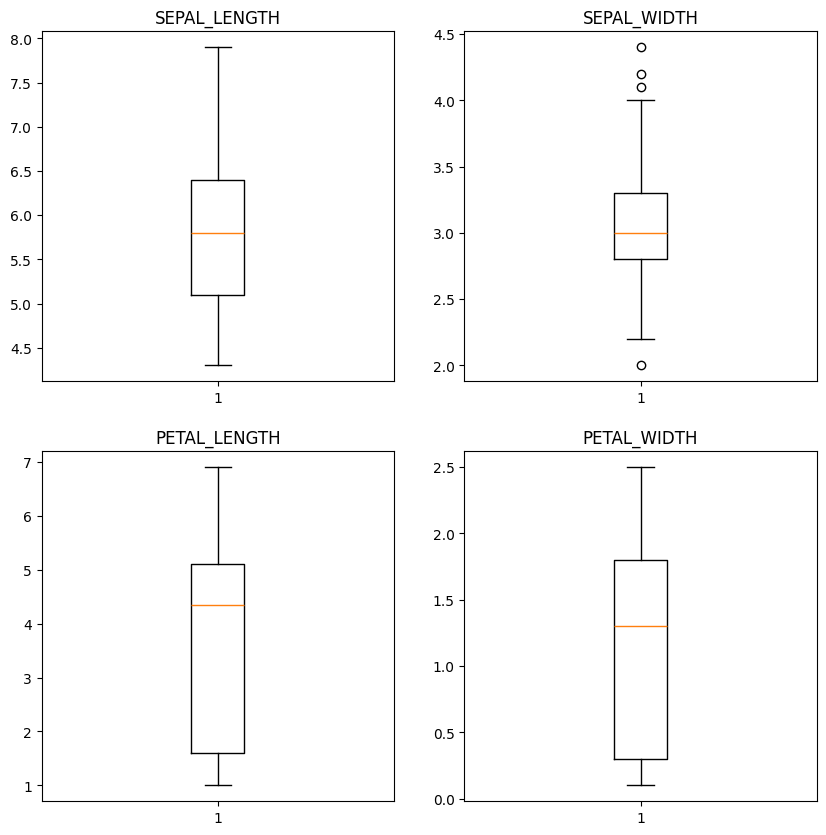

In [40]:
plt.figure(figsize=(10,10))
counter=1
for x in df.columns:
    if df[x].dtype == 'float64':
        plt.subplot(2, 2, counter)
        plt.title(x.upper())
        plt.boxplot(df[x])
        counter+=1
plt.show()


##### The Above Figure shows that Sepal_width columns contains some outlier values that needs to removed for better analysis

In [41]:
print(df['sepal_width'].describe())     
# By using this method we can easily identify minimum and maximum values according to IQR. 
# Any value outside this range will be treated has outlier of the data set.
# So we got our min value i.e 2.00 and max value i.e 4.40
mx_val = 4.4
mn_val = 2

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64


In [42]:
def outliers(x):
    global mn_val
    global mx_val
    if x <= mx_val:
        return x
    else:
        return 0
df['sepal_width'] = df['sepal_width'].apply(outliers)

In [43]:
df[df['sepal_width']==0]
# we have found that some values are being replaced by Zero that were outliers erliair

,sepal_length,sepal_width,petal_length,petal_width,species


In [44]:
df['sepal_width'] = df['sepal_width'].replace({0:df['sepal_width'].mean()}) # Replacing Zero Values with mean of the datset

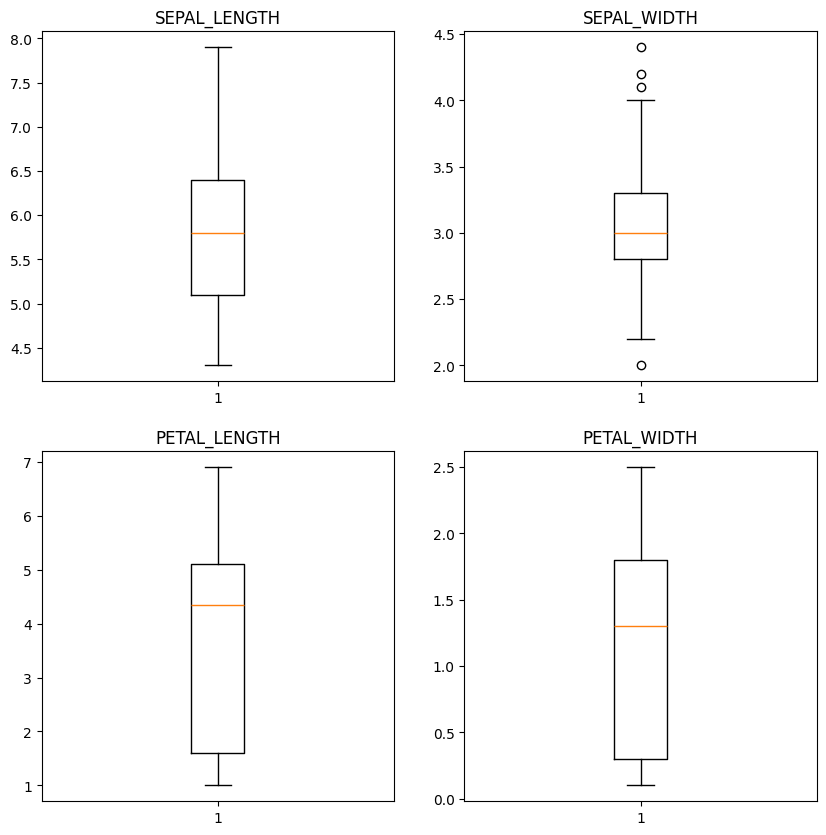

In [45]:
plt.figure(figsize=(10,10))
counter=1
for x in df.columns:
    if df[x].dtype == 'float64':
        plt.subplot(2, 2, counter)
        plt.title(x.upper())
        plt.boxplot(df[x])
        counter+=1
plt.show()


##### By doing above steps we have removed all the outliers present in our dataset
##### Now dataset in ready to Analysed in form of Graph 

In [46]:
print(df['sepal_width'].describe()) 

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64


In [47]:
df.sample(10)   # Gives Random Sample from the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
75,6.6,3.0,4.4,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
80,5.5,2.4,3.8,1.1,versicolor
138,6.0,3.0,4.8,1.8,virginica
13,4.3,3.0,1.1,0.1,setosa
36,5.5,3.5,1.3,0.2,setosa
128,6.4,2.8,5.6,2.1,virginica
72,6.3,2.5,4.9,1.5,versicolor
144,6.7,3.3,5.7,2.5,virginica
93,5.0,2.3,3.3,1.0,versicolor


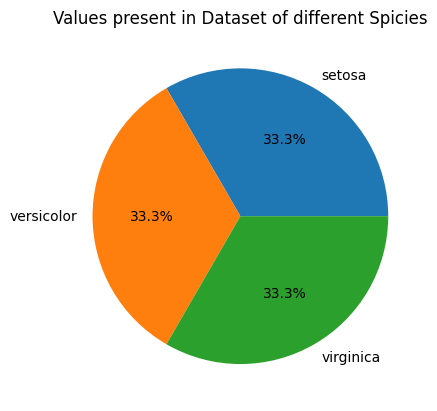

In [48]:
plt.pie(x=df.species.value_counts(),labels=df['species'].unique(),autopct='%1.1f%%')
plt.title('Values present in Dataset of different Spicies')
plt.show()

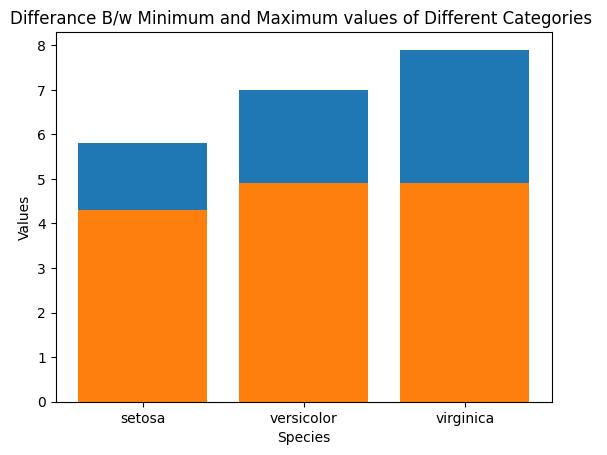

In [49]:
plt.bar(df.groupby('species')['sepal_length'].max().index,df.groupby('species')['sepal_length'].max());
plt.title('Differance B/w Minimum and Maximum values of Different Categories ')
plt.xlabel('Species')
plt.ylabel('Values')
plt.bar(df.groupby('species')['sepal_length'].min().index,df.groupby('species')['sepal_length'].min());

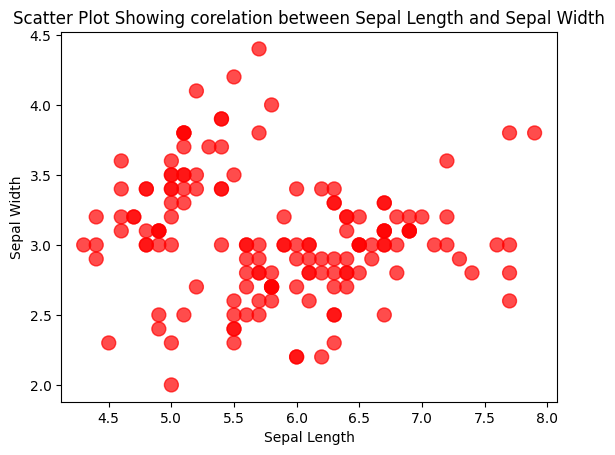

In [50]:
# Showing corelation between Sepal Length and Sepal Width 
colors = ['red' if sl > sw else 'blue' for sl, sw in zip(df['sepal_length'], df['sepal_width'])]
plt.scatter(df['sepal_length'], df['sepal_width'], c=colors, s=100, alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot Showing corelation between Sepal Length and Sepal Width')
plt.show()


In [51]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [52]:
# Showing corelation between Sepal Length and Sepal Width 
setosa=df[df["species"]=="setosa"]
versicolor=df[df["species"]=="versicolor"]
virginica=df[df["species"]=="virginica"]
plt.scatter(setosa['.0'], setosa['sepal_width'], s=100, alpha=0.7);
plt.scatter(versicolor['sepal_length'], versicolor['sepal_width'], s=100, alpha=0.7);
plt.scatter(virginica['sepal_length'], virginica['sepal_width'], s=100, alpha=0.7);
plt.xlabel('Sepal Length');
plt.ylabel('Sepal Width');
plt.legend(["setosa","versicolor","virginica"]);
plt.title('corelation between Sepal Length and Sepal Width of each species');

KeyError: '.0'

In [ ]:
setosa.describe()

In [ ]:
plt.hist(df['sepal_length'],bins=np.linspace(4,7,4,dtype=int),density=False);
plt.title('Frequency Distribution of Sepal');
plt.xlabel('Sepal Length');
# plt.subplot(1,2,2)
# plt.xticks(np.linspace(4,7,4,dtype=int));

# plt.hist(df['sepal_width'],bins=np.linspace(4,5,4),density=False);
# plt.xticks(np.linspace(4,5,4,dtype=float));
# plt.xlabel('Sepal Length')

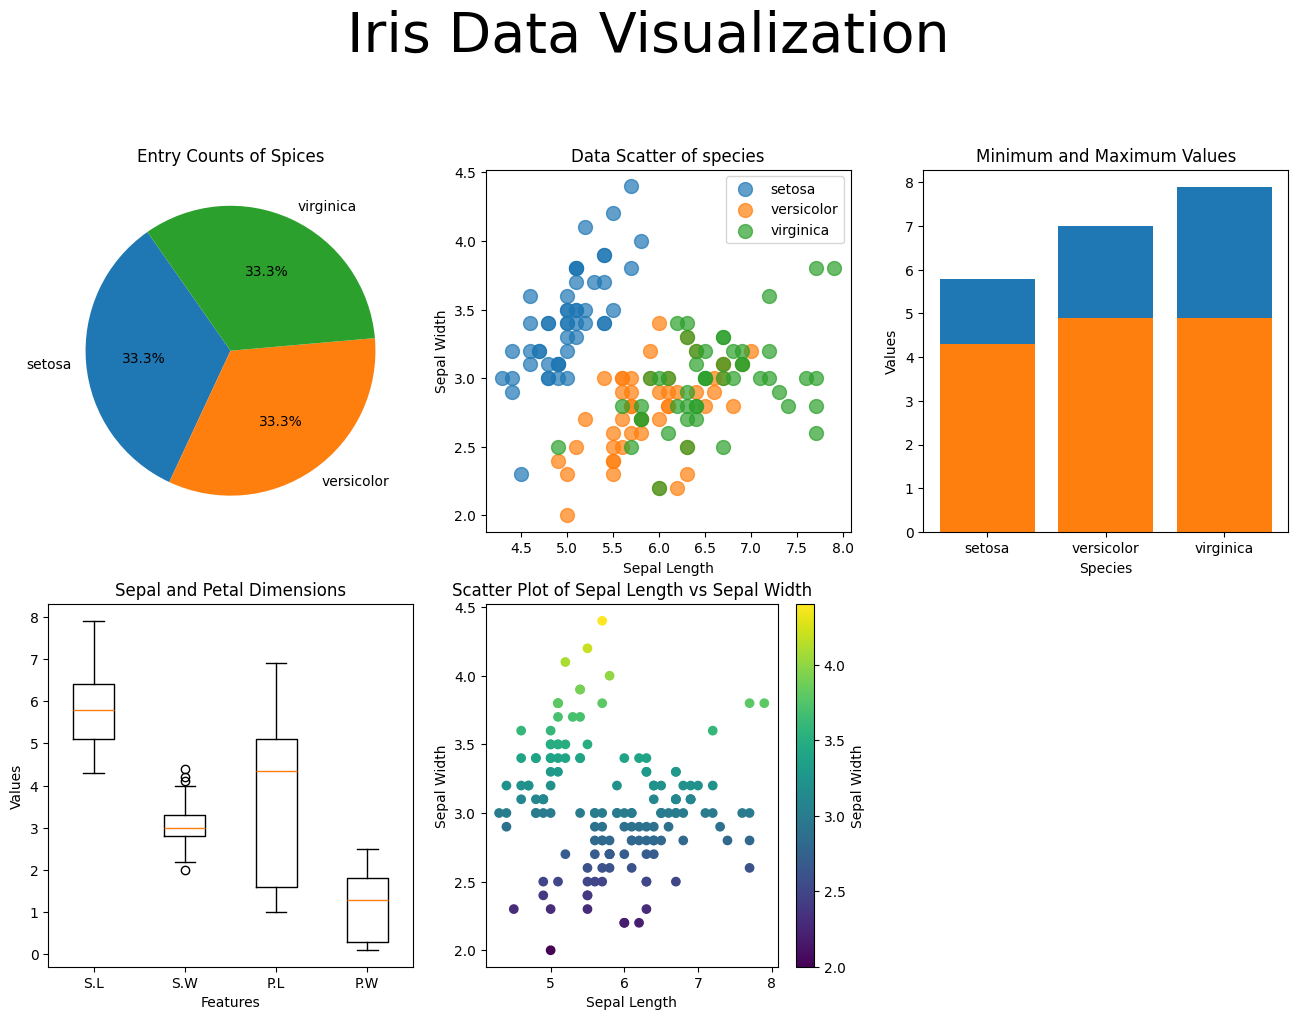

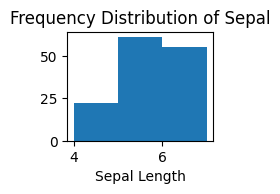

In [60]:
plt.figure(figsize=(16,16));
plt.suptitle('Iris Data Visualization',fontsize=40);
# plt.text(0.5, 0.92, 'Exploring Sepal and Petal Dimensions', ha='center', fontsize=20, alpha=0.75);

plt.subplot(3, 3, 1)
plt.title('Entry Counts of Spices')
plt.pie(x=df.species.value_counts(),labels=df['species'].unique(),autopct='%1.1f%%',startangle=125)
# plt.title('Values present in Dataset of different Spicies')

plt.subplot(3, 3, 2)
setosa=df[df["species"]=="setosa"]
versicolor=df[df["species"]=="versicolor"]
virginica=df[df["species"]=="virginica"]
plt.scatter(setosa['sepal_length'], setosa['sepal_width'], s=100, alpha=0.7);
plt.scatter(versicolor['sepal_length'], versicolor['sepal_width'], s=100, alpha=0.7);
plt.scatter(virginica['sepal_length'], virginica['sepal_width'], s=100, alpha=0.7);
plt.xlabel('Sepal Length');
plt.ylabel('Sepal Width');
plt.legend(["setosa","versicolor","virginica"]);
plt.title('Data Scatter of species');
plt.subplot(3, 3, 3)
plt.bar(df.groupby('species')['sepal_length'].max().index,df.groupby('species')['sepal_length'].max());
plt.title('Minimum and Maximum Values')
plt.xlabel('Species')
plt.ylabel('Values')
plt.bar(df.groupby('species')['sepal_length'].min().index,df.groupby('species')['sepal_length'].min());

plt.subplot(3, 3, 4)
plt.title('Sepal and Petal Dimensions')
data = [df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width']]
labels = ['S.L', 'S.W', 'P.L', 'P.W']
plt.boxplot(data, positions=[1, 2, 3, 4], labels=labels)
plt.xlabel('Features')
plt.ylabel('Values')

plt.subplot(3, 3, 5)
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['sepal_width'], cmap='viridis')
plt.colorbar(label='Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

plt.subplot(3, 3, 6)
plt.hist(df['sepal_length'],bins=np.linspace(4,7,4,dtype=int),density=False);
plt.title('Frequency Distribution of Sepal')
plt.xlabel('Sepal Length')
plt.show()

In [ ]:
sns.pairplot(df)

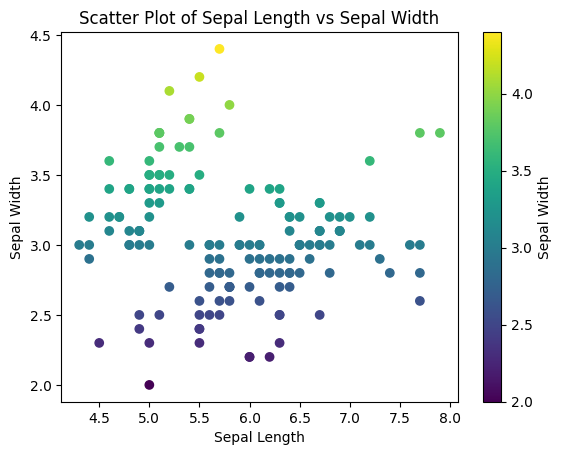

In [56]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame



In [63]:
corr=df.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


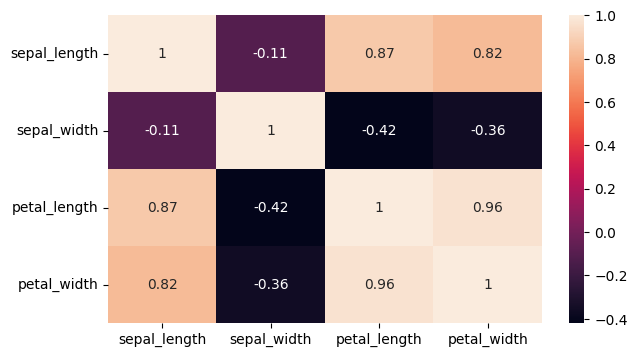

In [65]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(numeric_only=True),annot=True) 
plt.show()